# Introuction 
This notebook is divided into two parts:
- Part 1: Data preprocessing and model training
- Part 2: Model evaluation and prediction on test data

If you do not want to start a new training session i would recommend reviewing part one but only loading the libraries and heading to part two to plotting and evaluating the model metrics.

within the github repo you can find the data and the model save file along with the history of training. 

# Part 1 : Data preprocessing and model training

## Importing the libraries needed for the project

In [2]:
# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras_preprocessing import image
import tensorflow.keras.layers as layers


# Sklearn model performance utils
from sklearn.metrics import roc_curve, plot_roc_curve, auc 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score

# Misc libraries for other tasks 
import os
from pathlib import Path
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# used to prepare the image directory and split into train , validate , test for keras
# import splitfolders

### loading the images into a tensor flow dataframe object 

In [ ]:
# Split with a ratio only done once per project directory 
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

#image_folder = Path('/food_data/images')

#output_folder = Path('/food_data/output')

#splitfolders.ratio(image_folder, output=output_folder,
    #seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

## Model 1 with 148 Classes

### Creating the traning and test dataframes using keras 


In [4]:
# creatnig the training, testing and validation 
train_df_148 = image_dataset_from_directory(
    directory = '../Jay-branch/food_data/output/train',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100),
    
    
    )

test_df_148 = image_dataset_from_directory(
    directory = '../Jay-branch/food_data/output/test',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )

val_df_148 = image_dataset_from_directory(
    directory = '../Jay-branch/food_data/output/val',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )


Found 91237 files belonging to 148 classes.
Found 11415 files belonging to 148 classes.
Found 11358 files belonging to 148 classes.


In [ ]:
labels_148 = test_df_148.class_names
labels_148_df = pd.DataFrame(labels_148)
labels_148_df.columns =['ingredient']
labels_148_df
labels_148_df.to_csv('labels_148.csv')

### Visualizing the data 


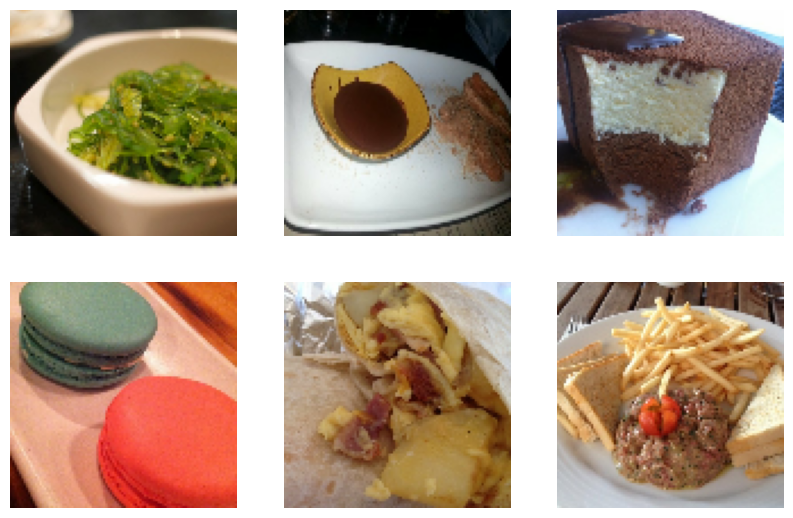

In [5]:
# plotting a sample of the images
plt.figure(figsize=(10,10))

for image , label in train_df_148.take(1):
    for i in range(6):
        ax = plt.subplot(3 ,3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')

### Define the model architecture and fitting the model

In [6]:
# The model will be a multi layer Conv2D and Maxpooling with Dropouts to help prevent overfitting , towrds the end 1 Dens layer will be there before our final output
model_148 = Sequential()
#layer 1,2,3 sequence 
model_148.add(Conv2D(filters= 32, kernel_size=(3,3),activation='relu',input_shape = (100, 100, 3)))
model_148.add(MaxPooling2D((2,2)))
model_148.add(Dropout(0.2))
#layer 4,5,6 sequence 
model_148.add(Conv2D(filters= 64, kernel_size=(3,3),activation='relu'))
model_148.add(MaxPooling2D((2,2)))
model_148.add(Dropout(0.2))

#Dense Network
model_148.add(Flatten())
model_148.add(Dense(1500,activation='relu'))
model_148.add(Dense(500,activation='relu'))
model_148.add(Dense(250,activation='relu'))
#output layer with 148 classifications 
model_148.add(Dense(148,activation='softmax'))

# compile the model_148
# using the adam optimizer and categorical crossentropy for loss as we are using one-hot encoding style catagories
model_148.compile(optimizer='adam' , 
              loss='categorical_crossentropy' ,
              metrics=[
                    'accuracy',
                    tf.keras.metrics.TruePositives(name="tp"),
                    tf.keras.metrics.TrueNegatives(name="tn"),
                    tf.keras.metrics.FalsePositives(name="fp"),
                    tf.keras.metrics.FalseNegatives(name="fn"),
                    tf.keras.metrics.Precision(name="precision"),
                    tf.keras.metrics.Recall(name="recall"),
                    tf.keras.metrics.AUC(name="auc"),
                    ]
            )


# printing out a summary of the model_148
# 
model_148.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

In [8]:
# Fitting the model with our traning dataset
history_148 = model_148.fit(train_df_148 , epochs=100 , batch_size=5 , validation_data=val_df_148 , verbose=1)
with open('model_148_history' , 'wb') as file:
 pkl.dump(history_148.history, file)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 683/2852 [======>.......................] - ETA: 17:43 - loss: 16.2655 - accuracy: 0.0106 - tp: 3.0000 - tn: 3212394.0000 - fp: 438.0000 - fn: 21853.0000 - precision: 0.0068 - recall: 1.3726e-04 - auc: 0.6007

KeyboardInterrupt: 

In [ ]:
#save the model for reuse and comparing 
model_148.save('model148')

INFO:tensorflow:Assets written to: model148/assets


In [ ]:
# evaluate the model 
model_148.evaluate(test_df_148)

#make predictions 
predictions_148 = model_148.predict(test_df_148)

358/358 [==============================] - 1356s 4s/step - loss: 9.6852 - accuracy: 0.0299 - tp: 52.0000 - tn: 1681137.0000 - fp: 396.0000 - fn: 11387.0000 - precision: 0.1161 - recall: 0.0045 - auc: 0.6142


## Model 2 with 36 Classes

### Creating the traning and test dataframes using keras 


In [ ]:
# creatnig the training, testing and validation 
train_df_36 = image_dataset_from_directory(
    directory = 'veg_fruits/train',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (200,200)

    )

test_df_36 = image_dataset_from_directory(
    directory = 'veg_fruits/test',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (200,200)
    )

val_df_36 = image_dataset_from_directory(
    directory = 'veg_fruits/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (200,200)
    )


Found 2914 files belonging to 36 classes.
Found 571 files belonging to 36 classes.
Found 563 files belonging to 36 classes.


In [ ]:
labels_36 = test_df_36.class_names
labels_36_df = pd.DataFrame(labels_36)
labels_36_df.columns =['ingredient']
labels_36_df
labels_36_df.to_csv('labels_36.csv')

### Visualizing the data 


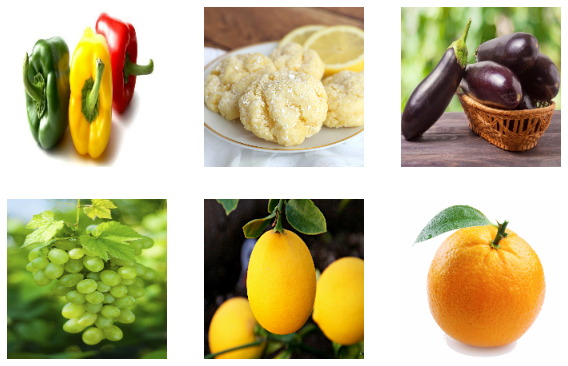

In [ ]:
# plotting a sample of the images
plt.figure(figsize=(10,10))

for image , label in train_df_36.take(1):
    for i in range(6):
        ax = plt.subplot(3 ,3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')

### Define the model architecture and fitting the model

In [ ]:
# The model will be a multi layer Conv2D and Maxpooling with Dropouts to help prevent overfitting , towrds the end 1 Dens layer will be there before our final output
model_36 = Sequential()
#layer 1,2,3 sequence 
model_36.add(Conv2D(filters= 32, kernel_size=(3,3),activation='relu',input_shape = (200, 200, 3)))
model_36.add(MaxPooling2D((2,2)))
model_36.add(Dropout(0.2))
#layer 4,5,6 sequence 
model_36.add(Conv2D(filters= 64, kernel_size=(3,3),activation='relu'))
model_36.add(MaxPooling2D((2,2)))
model_36.add(Dropout(0.2))

#Dense Network
model_36.add(Flatten())
model_36.add(Dense(3000,activation='relu'))
model_36.add(Dense(1500,activation='relu'))
model_36.add(Dropout(0.25))
model_36.add(Dense(500,activation='relu'))
#output layer with 36 classifications 
model_36.add(Dense(36,activation='softmax'))

# compile the model_36 using the adam optimizer and categorical crossentropy for loss as we are using one-hot encoding style catagories
model_36.compile(optimizer='adam' , 
              loss='categorical_crossentropy' ,
              metrics=[
                    'accuracy',
                    tf.keras.metrics.TruePositives(name="tp"),
                    tf.keras.metrics.TrueNegatives(name="tn"),
                    tf.keras.metrics.FalsePositives(name="fp"),
                    tf.keras.metrics.FalseNegatives(name="fn"),
                    tf.keras.metrics.Precision(name="precision"),
                    tf.keras.metrics.Recall(name="recall"),
                    tf.keras.metrics.AUC(name="auc"),
                    ]
            )


# printing out a summary of the model_36 
model_36.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 64)       

In [ ]:
# Fitting the model with our traning dataset
history_36 = model_36.fit(train_df_36 , epochs=100 , batch_size=10 , validation_data=val_df , verbose=1)
with open('model_36_history' , 'wb') as file:
 pkl.dump(history_36.history, file)

Epoch 1/100
92/92 [==============================] - 442s 5s/step - loss: 487.7014 - accuracy: 0.0456 - tp: 17.0000 - tn: 101450.0000 - fp: 540.0000 - fn: 2897.0000 - precision: 0.0305 - recall: 0.0058 - auc: 0.5132 - val_loss: 3.5979 - val_accuracy: 0.0231 - val_tp: 0.0000e+00 - val_tn: 19704.0000 - val_fp: 1.0000 - val_fn: 563.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5096
Epoch 2/100
92/92 [==============================] - 44s 448ms/step - loss: 3.5236 - accuracy: 0.0528 - tp: 2.0000 - tn: 101972.0000 - fp: 18.0000 - fn: 2912.0000 - precision: 0.1000 - recall: 6.8634e-04 - auc: 0.6072 - val_loss: 3.6658 - val_accuracy: 0.0355 - val_tp: 0.0000e+00 - val_tn: 19705.0000 - val_fp: 0.0000e+00 - val_fn: 563.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4092
Epoch 3/100
92/92 [==============================] - 44s 449ms/step - loss: 3.3588 - accuracy: 0.0920 - tp: 22.0000 - tn: 101947.0000 - fp: 43.0000 - fn: 2892.0000 - precision: 0.3

In [ ]:
#save the model for reuse and comparing 
model_36.save('model_vegies_fruits')

INFO:tensorflow:Assets written to: model_vegies_fruits/assets


In [ ]:
# evaluate the model 
model_36.evaluate(test_df_36)

#make predictions 
predictions_36 = model_36.predict(test_df_36)

18/18 [==============================] - 59s 2s/step - loss: 7.9008 - accuracy: 0.6007 - tp: 341.0000 - tn: 19793.0000 - fp: 192.0000 - fn: 230.0000 - precision: 0.6398 - recall: 0.5972 - auc: 0.8175


# Part 2 : Model 1&2 performance metrics and evaluation 

## Loading the model history and model save file

In [ ]:
# Loading the models into memory from the files 
model_148 = keras.models.load_model('model148')
model_36 = keras.models.load_model('../Jay-branch/model_veg_fruits')

# Loading the history files from history saved files
history_148 = pkl.load(open('model_148_history' , 'rb'))
history_36 = pkl.load(open('model_36_history' , 'rb'))

In [ ]:
history_148.keys(), history_36.keys() 

(dict_keys(['loss', 'accuracy', 'tp', 'tn', 'fp', 'fn', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_tp', 'val_tn', 'val_fp', 'val_fn', 'val_precision', 'val_recall', 'val_auc']),
 dict_keys(['loss', 'accuracy', 'tp', 'tn', 'fp', 'fn', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_tp', 'val_tn', 'val_fp', 'val_fn', 'val_precision', 'val_recall', 'val_auc']))

## Accuracy and Loss Per Epoch 

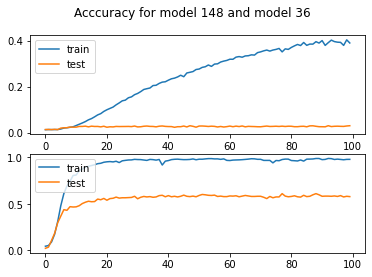

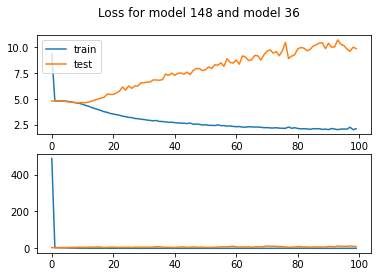

In [ ]:
# Creating the Accuracy and Loss figures 
fig_acc , (ax1 , ax2) = plt.subplots(2,1)
fig_loss , (ax3,ax4) = plt.subplots(2,1)

# adding title descriptions 
fig_acc.suptitle('Acccuracy for model 148 and model 36')
fig_loss.suptitle('Loss for model 148 and model 36')

# Plotting Accuracy for the model and the valdiation data for both models
ax1.plot(history_148['accuracy'])
ax1.plot(history_148['val_accuracy'])
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_36['accuracy'])
ax2.plot(history_36['val_accuracy'])
ax2.legend(['train', 'test'], loc='upper left')
# Plotting Loss for the model and the valdiation data for both models
ax3.plot(history_148['loss'])
ax3.plot(history_148['val_loss'])
ax3.legend(['train', 'test'], loc='upper left')
ax4.plot(history_36['loss'])
ax4.plot(history_36['val_loss'])
ax3.legend(['train', 'test'], loc='upper left')

## Confusion Matrix and Classification Reports 

In [ ]:
# From Sklearn resources this is a function to plot the confusion matrix 
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Classification Report for the 148 Class Model
# although the model traning was done using the Image_dataset_from_directory method , it was much easier to obtain the needed structures using the ImageDataGenerator method 
test_generator_148 = ImageDataGenerator()
test_data_generator_148 = test_generator_148.flow_from_directory(
    '../Jay-branch/food_data/output/test', 
     target_size=(100, 100),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch_148 = np.math.ceil(test_data_generator_148.samples / test_data_generator_148.batch_size)

# running the model predictions on the dataset genrated from ImageDataGenrator 
predictions_148 = model_148.predict(test_data_generator_148, steps=test_steps_per_epoch_148)

# refine the datastructure to only include the heights probability class 
predicted_classes_148 = np.argmax(predictions_148, axis=1)

# crate a list of the labels from the geenrated dataset
true_classes_148 = test_data_generator_148.classes
class_labels_148 = list(test_data_generator_148.class_indices.keys()) 

# Run the sklearn reporting method 
report_148 = classification_report(true_classes_148, predicted_classes_148, target_names=class_labels_148)
print(report_148)     

Found 11415 images belonging to 148 classes.
                         precision    recall  f1-score   support

                  Bread       0.00      0.00      0.00       100
          Dairy product       0.03      0.05      0.03        44
                Dessert       0.03      0.03      0.03       150
                    Egg       0.00      0.00      0.00       100
             Fried food       0.00      0.00      0.00        86
                   Meat       0.00      0.00      0.00       133
          Noodles-Pasta       0.00      0.00      0.00        44
                   Rice       0.00      0.00      0.00        28
                Seafood       0.00      0.00      0.00        86
                   Soup       0.32      0.25      0.28       150
        Vegetable-Fruit       0.02      0.01      0.02        72
                  apple       0.00      0.00      0.00         5
              apple_pie       0.03      0.03      0.03       100
         baby_back_ribs       0.13      0.03

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 4 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 7 ... 0 4 0]
 [0 0 0 ... 0 0 0]]


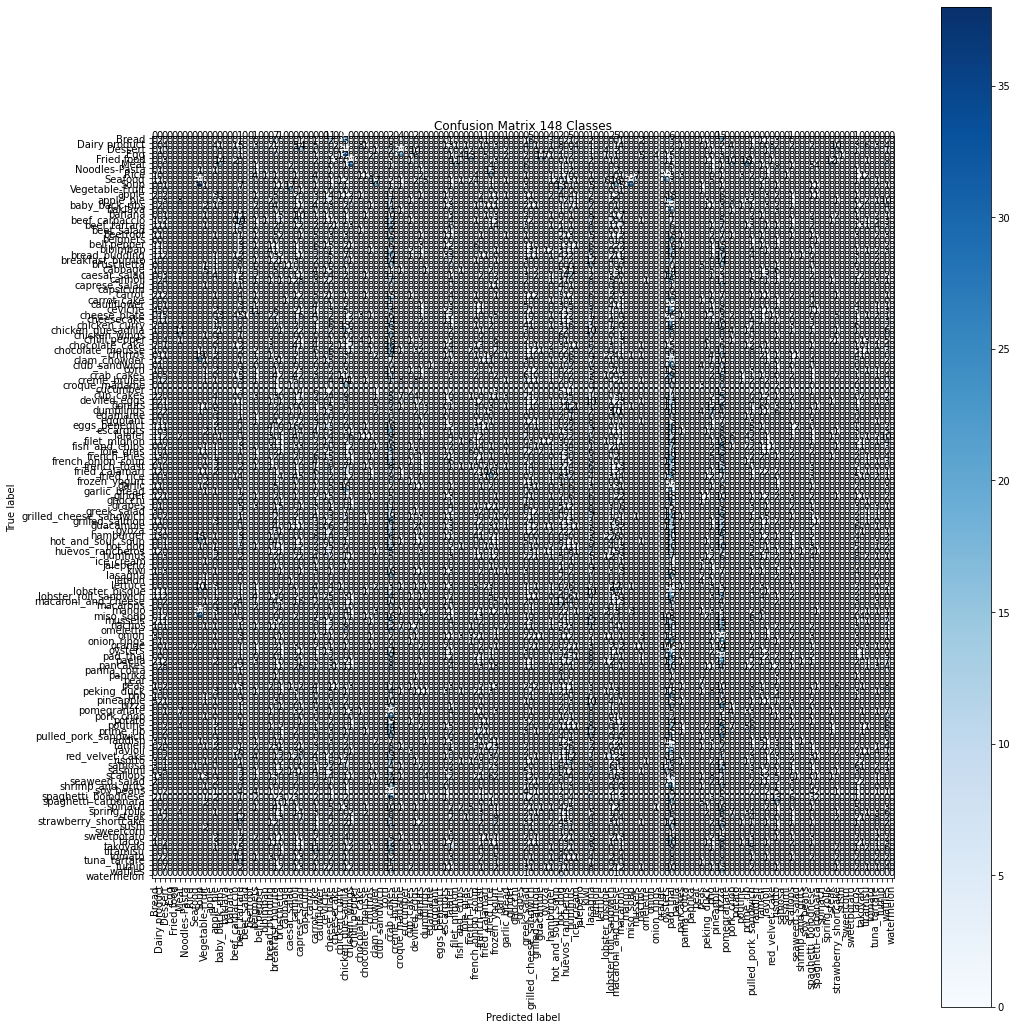

In [ ]:
# output the confusion matrix 
cm_148 = confusion_matrix(y_true=test_data_generator_148.classes, y_pred=predicted_classes_148)
    
# plot the CM using the defined method from SKlearn 
plot_confusion_matrix(cm=cm_148 , classes= class_labels_148 , title='Confusion Matrix 148 Classes')

In [ ]:
# Classification Report for the 36 Class Model using the above method
test_generator_36 = ImageDataGenerator()
test_data_generator_36 = test_generator_36.flow_from_directory(
    'veg_fruits/validation', 
     target_size=(100, 100),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch_36 = np.math.ceil(test_data_generator_36.samples / test_data_generator_36.batch_size)

predictions_36 = model_36.predict(test_data_generator_36, steps=test_steps_per_epoch_36)

predicted_classes_36 = np.argmax(predictions_36, axis=1)

true_classes_36 = test_data_generator_36.classes
class_labels_36 = list(test_data_generator_36.class_indices.keys()) 

report_36 = classification_report(true_classes_36, predicted_classes_36, target_names=class_labels_36)
print(report_36)

Found 563 images belonging to 36 classes.
               precision    recall  f1-score   support

        apple       0.44      0.70      0.54        10
       banana       0.58      0.78      0.67         9
     beetroot       0.67      1.00      0.80        10
  bell pepper       0.75      1.00      0.86         9
      cabbage       0.71      1.00      0.83        10
     capsicum       0.75      0.90      0.82        10
       carrot       0.62      1.00      0.76         8
  cauliflower       0.43      1.00      0.61        10
chilli pepper       0.39      1.00      0.56         7
         corn       0.46      0.60      0.52        10
     cucumber       0.45      1.00      0.62        10
     eggplant       0.62      1.00      0.77        10
       garlic       0.83      1.00      0.91        10
       ginger       0.83      1.00      0.91        10
       grapes       0.60      1.00      0.75         9
     jalepeno       0.41      1.00      0.58         9
         kiwi       0.

Confusion matrix, without normalization
[[ 7  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 10]]


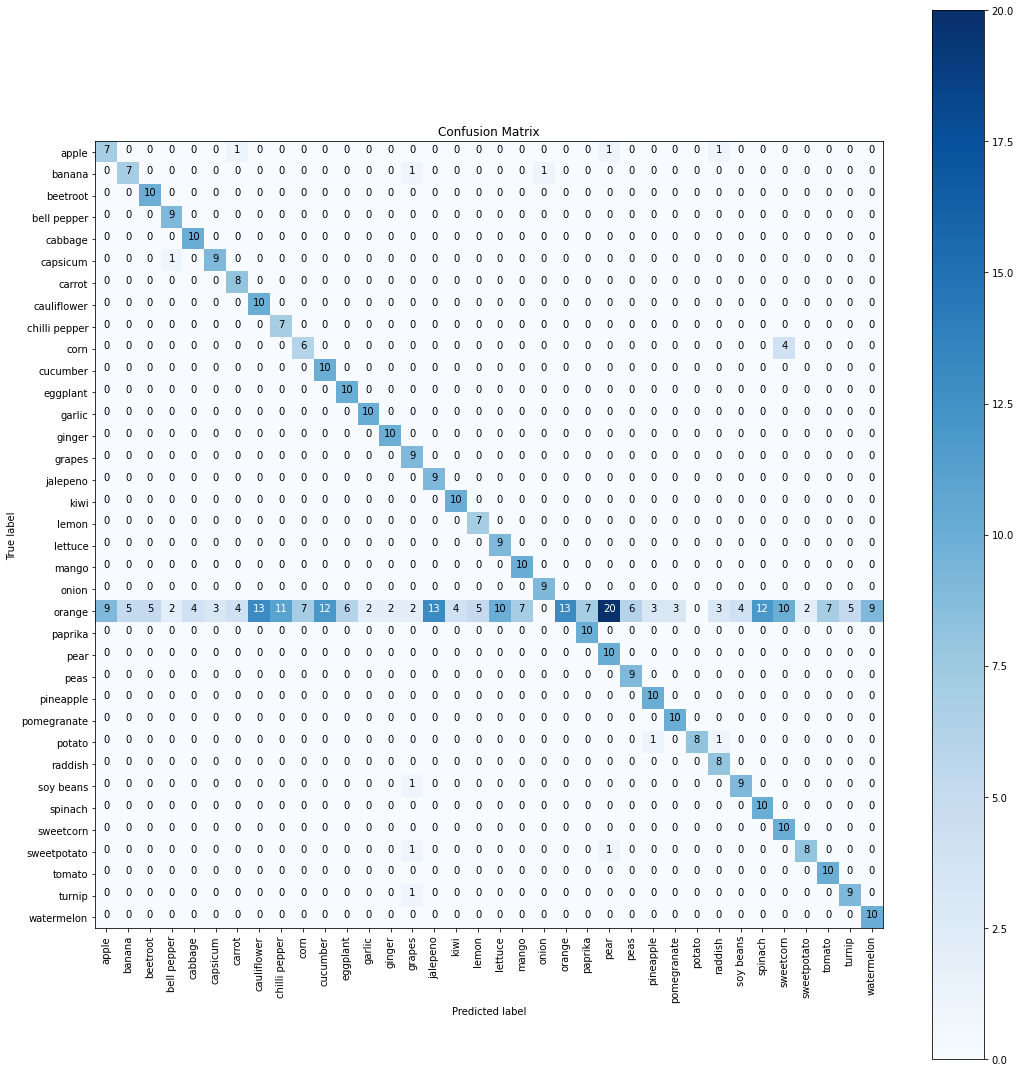

In [ ]:
# output the confusion matrix 
cm_36 = confusion_matrix(y_true=test_data_generator_36.classes, y_pred=predicted_classes_36)
    
# plot the CM using the defined method from SKlearn 
plot_confusion_matrix(cm=cm_36 , classes= class_labels_36 , title='Confusion Matrix')
